# Package Management 

## Learning Objectives 
- Understand the basics of Julia's package management system 
- Add (install), remove, and update packages using Julia's package manager (Pkg)
- Import and use installed packages in your Julia environment 
- View and manage installed packages (e.g. check the status of the environment) 
- Identify some common Julia packages and their uses and understand best practices for package management 
- Julia has a built-in package manager, commonly accessed via the `Pkg` module or the special package REPL mode. Julia packages are versioned and organised in environments which allow different projects to have different sets of dependencies.

## Overview of Julia's Package System
Julia's package ecosystem provides a wide range of functionality, from data manipulation and plotting to machine learning and beyond. The package manage (`Pkg`) is designed to make it easy to install and manage these packages and their dependencies. 

Some key points:
Julia's package manager uses **environments**. An environment is basically a set of packages and specific versions that you are using in a project, recorded in a `Project.toml` and `Manifest.toml`. By default, when you use the Julia REPLY or Jupyter, you're in the "default environment".
Packages are identified by names (e.g. `DataFrames`) and are usually hosted in the General registry (default). Pkg can be installed from the registry or directly from git repositories or local paths if needed. 
Common package operations: `Pkg.add("PackageName")`, `Pkg.rm("PackageName")`, `Pkg.update("PackageName")`, or even just `Pkg.update()` to update everything, `Pkg.status()` to list installed packages in the current environment. 

## Using Packages 

To use a package in your Julia code, you typically need to **add** it (install it) once and then **using** in each session where you need it. 

## Adding Packages 

Use `Pkg.add("PackageName")` to install a package. For example, to add the Plots.jk package, you can use: 
```Julia 
using Pkg
Pkg.add("Plots")
```

This will download the package (and any of its dependencies) from the registry and install it in your environment. You only need to do this once per environment for each package. 

**Note**: Before you can call `Pkg.add`, you need to have done using `Pkg` (since `Pkg` is itself a module that needs to be brought into scope). In fact, `Pkg` is a standard library module, so no additional install is needed for `Pkg` itself, but you still need to using `Pkg` in a script or notebook.

After adding a package, you load it in your code with `using PackageName`.

Once we have installed the package we can then use it such as with: 


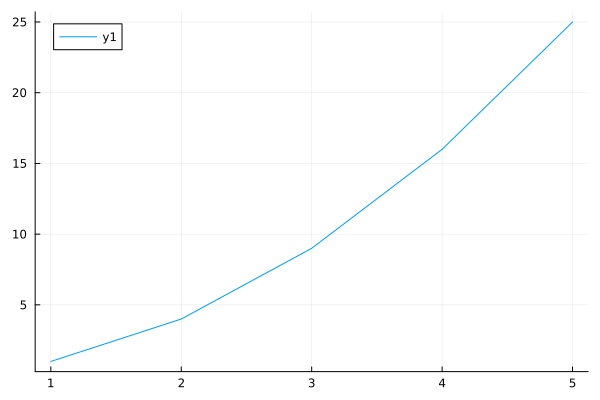

In [2]:
using Plots
plot(1:5, [1,4,9,16,25])  # Just to verify Plots works (this should plot a parabola)

## Removing Packages
If you need to remove a package from the environment (to perhaps clean up or if it's not needed anymore), use `Pkg.rm("PackageName")`: 

```Julia 
Pkg.rm("Plots")

```
This will remove Plots from the current project environment (it doesn’t delete the package from disk immediately; Julia keeps packages in a global storage so they don’t have to be re-downloaded for other environments, but it will update the environment’s project file to not include Plots).

## Updating Packages 

Packages can be updated to newer versions. You can update a specific package:
```Julia 
Pkg.update("Plots")
```

This will fetch the latest version of Plots (and any dependent packages that need updating) according to the registry, respecting compatibility constraints of other packages. If you want to update all packages in the environment to their latest compatible versions:

```Julia 
Pkg.update()
```
with no argument will do that.

It’s good practice to periodically update, but in a stable project, you might keep versions fixed for reproducibility. The `Project.toml` and `Manifest.toml` help ensure you can recreate the same environment elsewhere.

## Viewing Installed Packages 

To see what packages (and their versions) are in the current environment, use: 

```Julia 
Pkg.status()
```
This will list each package, its version, and possibly a GitHub commit reference if it’s not an officially tagged release.

If you’re in the default environment and you’ve installed many packages over time, this list can be long. When working on a specific project, it’s often better to create a dedicated environment for it (using `Pkg.activate`) so you only have the packages you need for that project installed, which keeps things organized. 

## Package Environments 

While not an in-depth coverage, be aware that you can create project-specific environments. For example:

```Julia 
using Pkg
Pkg.activate("MyProject")
Pkg.add("DataFrames")
Pkg.add("CSV")
```

This will create a new environment in a folder "MyProject" with its own `Project.toml`, and install `DataFrames` and `CSV` there (actually it will link to the global installed copies but mark them in `Project.toml`). You can then `Pkg.activate` that environment whenever you work on that project, isolating it from other work. This is similar to virtual environments in Python.

## Best Practices in Package Management 

- Only `Pkg.add` inside the package manager or initialisation step of a project, not in performance-critical code or inside functions that run repeatedly. 
- Use version control (project/Manifest tool files) to look at package versions for reproducibility. 
- Use `using PackageName` at the top of your script/notebook after you've added the package. This makes it clear what external libraries your code depends on. 
- To share your environment (for example, giving your code to someone else or using it on another machine), share the `Project.toml` and 'Manifest.toml`. They can do `Pkg.activate` on that project and `Pkg.instantiate()` to install the exact version listed. 

## Overview of Common Packages in Julia

Julia has a rich ecosystem of packages that cater to various needs such as data manipulation, visualization, scientific computing, and more. Below is an overview of some commonly used packages along with links to detailed resources for each package.

### 1. DataFrames.jl
`DataFrames.jl` provides tools for working with tabular data, similar to pandas in Python or data.frame in R. It is essential for data manipulation and analysis.

[DataFrames.jl](https://dataframes.juliadata.org/stable/)

### 2. Plots.jl
`Plots.jl` is a powerful and flexible plotting package in Julia. It supports multiple backends and is widely used for creating a variety of visualizations.

[Plots.jl](https://docs.juliaplots.org/stable/)

### 3. CSV.jl
`CSV.jl` is a fast and reliable package for reading and writing CSV files. It integrates seamlessly with `DataFrames.jl` for handling tabular data.

[CSV.jl](https://csv.juliadata.org/stable/)

### 4. JuliaDB.jl
`JuliaDB.jl` is designed for working with large datasets. It provides powerful tools for data manipulation and analysis, optimized for performance.

[JuliaDB.jl](http://juliadb.org/latest/)

### 5. JuMP.jl
`JuMP.jl` is a domain-specific modelling language for mathematical optimization embedded in Julia.
It is used for linear programming, non-linear programming, and other optimization problems.

[JuMP.jl](https://jump.dev/JuMP.jl/stable/)

### 6. Distributions.jl
`Distributions.jl` provides a large collection of probability distributions and related functions. It is useful for statistical modelling and probabilistic computations.

[Distributions.jl](https://juliastats.org/Distributions.jl/stable/)

### 7. Flux.jl
`Flux.jl` is a machine learning library in Julia. It is designed to be easy to use while being highly extensible, providing tools for building and training neural networks.

[Flux.jl](https://fluxml.ai/Flux.jl/stable/)

### 8. Makie.jl
`Makie.jl` is a high-performance plotting library for data visualization. It provides a powerful and flexible interface for creating complex visualizations.

[Makie.jl](https://makie.juliaplots.org/stable/)

### 9. HTTP.jl
`HTTP.jl` is a package for handling HTTP requests and responses. It is useful for web development, API interactions, and network programming.

[HTTP.jl](https://juliaweb.github.io/HTTP.jl/stable/)

### 10. Gadfly.jl
`Gadfly.jl` is a plotting and data visualization system inspired by ggplot2 in R. It is great for creating complex, aesthetically pleasing plots.

[Gadfly.jl](http://gadflyjl.org/stable/)

By using the above links, you can explore more about each package and learn how to effectively use them in Julia.


## Exercise: Exploring Julia Packages

Julia has a rich ecosystem of packages that support a wide range of tasks. Now it's your turn to explore one of these packages and see how it might fit into your own workflows or projects.
- Choose **one package** from the list above that aligns with your interests or the kind of work you expect to do after this course (e.g. data analysis, visualization, optimization, scientific computing, etc.).
- Install the package using `Pkg.add("PackageName")` if it's not already available.
- Try a **simple example** using the package:
  - For plotting packages, create a basic plot (e.g. line plot, scatter plot).
  - For data packages, load or create a small dataset and perform a basic manipulation or analysis.



In [3]:
using JSON

function show_quiz_from_json(path)
    quiz_data = JSON.parsefile(path)

    html = """
    <style>
    .quiz-question {
        background-color: #6c63ff;
        color: white;
        padding: 12px;
        border-radius: 10px;
        font-weight: bold;
        font-size: 1.2em;
        margin-bottom: 10px;
    }

    .quiz-form {
        margin-bottom: 20px;
    }

    .quiz-answer {
        display: block;
        background-color: #f2f2f2;
        border: none;
        border-radius: 10px;
        padding: 10px;
        margin: 5px 0;
        font-size: 1em;
        cursor: pointer;
        text-align: left;
        transition: background-color 0.3s;
        width: 100%;
    }

    .quiz-answer:hover {
        background-color: #e0e0e0;
    }

    .correct {
        background-color: #4CAF50 !important;
        color: white !important;
        border: none;
    }

    .incorrect {
        background-color: #D32F2F !important;
        color: white !important;
        border: none;
    }

    .feedback {
        margin-top: 10px;
        font-weight: bold;
        font-size: 1em;
    }
    </style>

    <script>
    function handleAnswer(qid, aid, feedback, isCorrect) {
        // Reset all buttons for the question
        let buttons = document.querySelectorAll(".answer-" + qid);
        buttons.forEach(btn => {
            btn.classList.remove('correct', 'incorrect');
        });

        // Apply correct/incorrect to selected
        let selected = document.getElementById(aid);
        selected.classList.add(isCorrect ? 'correct' : 'incorrect');

        // Show feedback below the question
        let feedbackBox = document.getElementById('feedback_' + qid);
        feedbackBox.innerHTML = feedback;
        feedbackBox.style.color = isCorrect ? 'green' : 'red';
    }
    </script>
    """

    for (i, question) in enumerate(quiz_data)
        qid = "$i"
        html *= """<div class="quiz-question">$(question["question"])</div><form class="quiz-form">"""

        for (j, answer) in enumerate(question["answers"])
            aid = "q$(i)_a$(j)"
            feedback = answer["feedback"]
            correct = startswith(lowercase(feedback), "correct")
            html *= """
            <button type="button" class="quiz-answer answer-$qid" id="$aid"
                onclick="handleAnswer('$qid', '$aid', '$feedback', $(correct))">
                $(answer["answer"])
            </button>
            """
        end

        html *= """<div class="feedback" id="feedback_$qid"></div></form><hr>"""
    end

    display("text/html", html)
end


# Use the function
show_quiz_from_json("questions/summary_package_management.json")

What is the correct way to add the Plots package in Julia? 
 add("Plots")
 
 
 Pkg.install("Plots")
 
 
 using Pkg; Pkg.add("Plots")
 
 
 Pkg.load("Plots")
 
 Why should you consider using Pkg.activate("MyProject") before installing packages? 
 It downloads faster
 
 
 It installs packages globally
 
 
 It creates a project-specific environmetn with its own "Project.toml"
 
 
 It prevents you from using older package versions